# Import Libraries

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, PredictionErrorDisplay

## Reading the logaritmic dataset

In [166]:
DATA = pd.read_csv("Log_FinalData.csv", index_col="Unnamed: 0")
DATA

,log_pctWSocSec,log_perCapInc,log_PctEmplProfServ,log_FemalePctDiv,log_NumImmig,log_PctImmigRec10,log_PctPersOwnOccup,log_PctHousLess3BR,log_OwnOccLowQuart,log_PctSameCity85,log_PctSameState85,log_LandArea,log_PopDens,log_PctUsePubTrans,log_ViolentCrimesPerPop,log_racepctblack,log_racePctWhite,log_racePctAsian,log_racePctHisp
0,0.110590,0.146128,0.149219,0.243038,0.012837,0.143015,0.190332,0.178977,0.086360,0.178977,0.214844,0.049218,0.100371,0.079181,0.079181,0.008600,0.278754,0.049218,0.068186
1,0.096910,0.136721,0.060698,0.281033,0.004321,0.212188,0.100371,0.260071,0.082785,0.204120,0.181844,0.008600,0.049218,0.161368,0.222716,0.049218,0.240549,0.161368,0.029384
2,0.139879,0.103804,0.110590,0.232996,0.000000,0.075547,0.152288,0.178977,0.071882,0.222716,0.193125,0.004321,0.082785,0.008600,0.155336,0.173186,0.193125,0.068186,0.017033
3,0.133539,0.133539,0.161368,0.173186,0.008600,0.117271,0.287802,0.004321,0.093422,0.214844,0.217484,0.008600,0.143015,0.107210,0.049218,0.301030,0.033424,0.049218,0.041393
4,0.158362,0.155336,0.139879,0.079181,0.000000,0.103804,0.276462,0.075547,0.117271,0.206826,0.184691,0.017033,0.037426,0.008600,0.012837,0.008600,0.290035,0.037426,0.021189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.113943,0.173186,0.225309,0.201397,0.004321,0.167317,0.190332,0.173186,0.079181,0.170262,0.143015,0.004321,0.107210,0.021189,0.037426,0.041393,0.271842,0.049218,0.064458
1990,0.100371,0.071882,0.149219,0.193125,0.021189,0.222716,0.049218,0.204120,0.133539,0.041393,0.000000,0.008600,0.136721,0.079181,0.161368,0.164353,0.107210,0.262451,0.120574
1991,0.198657,0.117271,0.146128,0.176091,0.025306,0.100371,0.139879,0.220108,0.123852,0.252853,0.245513,0.033424,0.120574,0.071882,0.089905,0.096910,0.227887,0.017033,0.096910
1992,0.152288,0.146128,0.195900,0.113943,0.025306,0.173186,0.143015,0.214844,0.187521,0.201397,0.181844,0.012837,0.139879,0.123852,0.075547,0.025306,0.271842,0.086360,0.041393


## Creating test and train sets for model fitting

In [167]:
X = DATA.drop(["log_ViolentCrimesPerPop"],axis=1).copy()
Y = DATA.log_ViolentCrimesPerPop

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train.size, X_test.size

(25110, 10782)

# Fitting X and Y train data under linear model

The only assumption made for this model is that the intercept is zero since if this wasn't the case then we should expect some "intrinsic" number of violent crimes in any community independent of the magnitudes of social/economic parameters. Therefore, the constant of the model will not be considered.

In [168]:
Linear_Regressor = LinearRegression(fit_intercept=False, positive=True)
Linear_Regressor.fit(X_train, Y_train)

Y_pred = Linear_Regressor.predict(X_test)

# Model Evaluation

In [169]:
MS2_E = mean_squared_error(Y_test, Y_pred, squared=False)
MA_E = mean_absolute_error(Y_test, Y_pred)
R2 = r2_score(Y_test, Y_pred)

print(f"{MS2_E=} ")
print(f"{MA_E=} ")
print(f"{R2=} ")

MS2_E=0.0450098647192509 
MA_E=0.034184022848590075 
R2=0.5906835402647382 


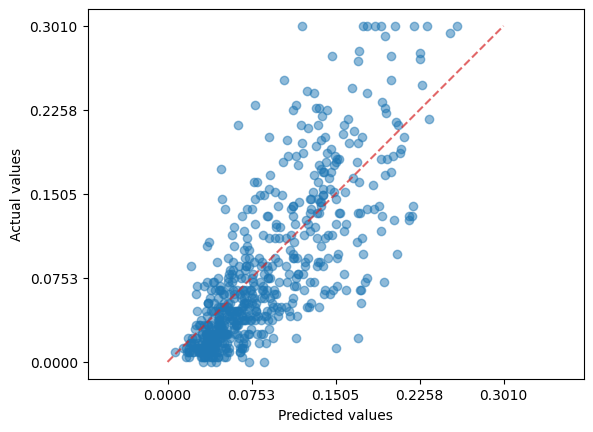

In [170]:
PredictionErrorDisplay.from_predictions(y_true=Y_test, y_pred=Y_pred, kind="actual_vs_predicted",
                       scatter_kwargs={"alpha":0.5, "color":"tab:blue"},
                       line_kwargs={"color":"tab:red"})